In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import string
from sklearn.preprocessing import OrdinalEncoder
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'


In [3]:
#customize possible missing value
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
train=pd.read_csv("/Users/bijiben/Desktop/BDA/advancedanalytics/assignment1/train.csv", na_values = missing_value_formats)

In [4]:
clear_list=['property_id', 'host_about', 'host_response_time', 'host_response_rate', 'host_nr_listings', 'host_nr_listings_total', 
      'host_verified', 'booking_price_covers', 'booking_min_nights', 'booking_max_nights', 'property_beds']

In [5]:
df=train[clear_list]
df.head()

,property_id,host_about,host_response_time,host_response_rate,host_nr_listings,host_nr_listings_total,host_verified,booking_price_covers,booking_min_nights,booking_max_nights,property_beds
0,1,NaN,within a few hours,100.0,1.0,1.0,"email, phone, reviews",1,1,1125,1.0
1,2,NaN,within a few hours,75.0,1.0,1.0,"email, phone, reviews",1,2,15,2.0
2,3,ik ben een expat die alleen mid weeks in Antwe...,within an hour,100.0,1.0,1.0,"email, phone, reviews",1,2,1125,1.0
3,4,"Hello, I was born in the Netherlands and i sp...",within an hour,100.0,2.0,2.0,"email, phone, facebook, reviews, jumio",1,1,1125,1.0
4,5,"Hello, I was born in the Netherlands and i sp...",within an hour,100.0,2.0,2.0,"email, phone, facebook, reviews, jumio",1,1,1125,1.0


In [6]:
#investigate data type 
types=df.dtypes
print(types)

property_id                 int64
host_about                 object
host_response_time         object
host_response_rate        float64
host_nr_listings          float64
host_nr_listings_total    float64
host_verified              object
booking_price_covers        int64
booking_min_nights          int64
booking_max_nights          int64
property_beds             float64
dtype: object


In [7]:
#check missingness in data
df.isnull().sum()
#quite lot null values in data, can not directly drop the row

property_id                  0
host_about                3107
host_response_time        1461
host_response_rate        1461
host_nr_listings             1
host_nr_listings_total       1
host_verified                0
booking_price_covers         0
booking_min_nights           0
booking_max_nights           0
property_beds               11
dtype: int64

In [8]:
#process numeric value
num_list=['host_response_rate','host_nr_listings',
          'host_nr_listings_total','booking_price_covers','booking_min_nights', 'booking_max_nights', 'property_beds']
num=df[num_list]
num.head(10)

,host_response_rate,host_nr_listings,host_nr_listings_total,booking_price_covers,booking_min_nights,booking_max_nights,property_beds
0,100.0,1.0,1.0,1,1,1125,1.0
1,75.0,1.0,1.0,1,2,15,2.0
2,100.0,1.0,1.0,1,2,1125,1.0
3,100.0,2.0,2.0,1,1,1125,1.0
4,100.0,2.0,2.0,1,1,1125,1.0
5,100.0,1.0,1.0,2,1,5,1.0
6,0.0,1.0,1.0,3,3,1125,3.0
7,100.0,1.0,1.0,1,1,7,1.0
8,100.0,2.0,2.0,1,30,1125,1.0
9,70.0,2.0,2.0,1,1,1125,1.0


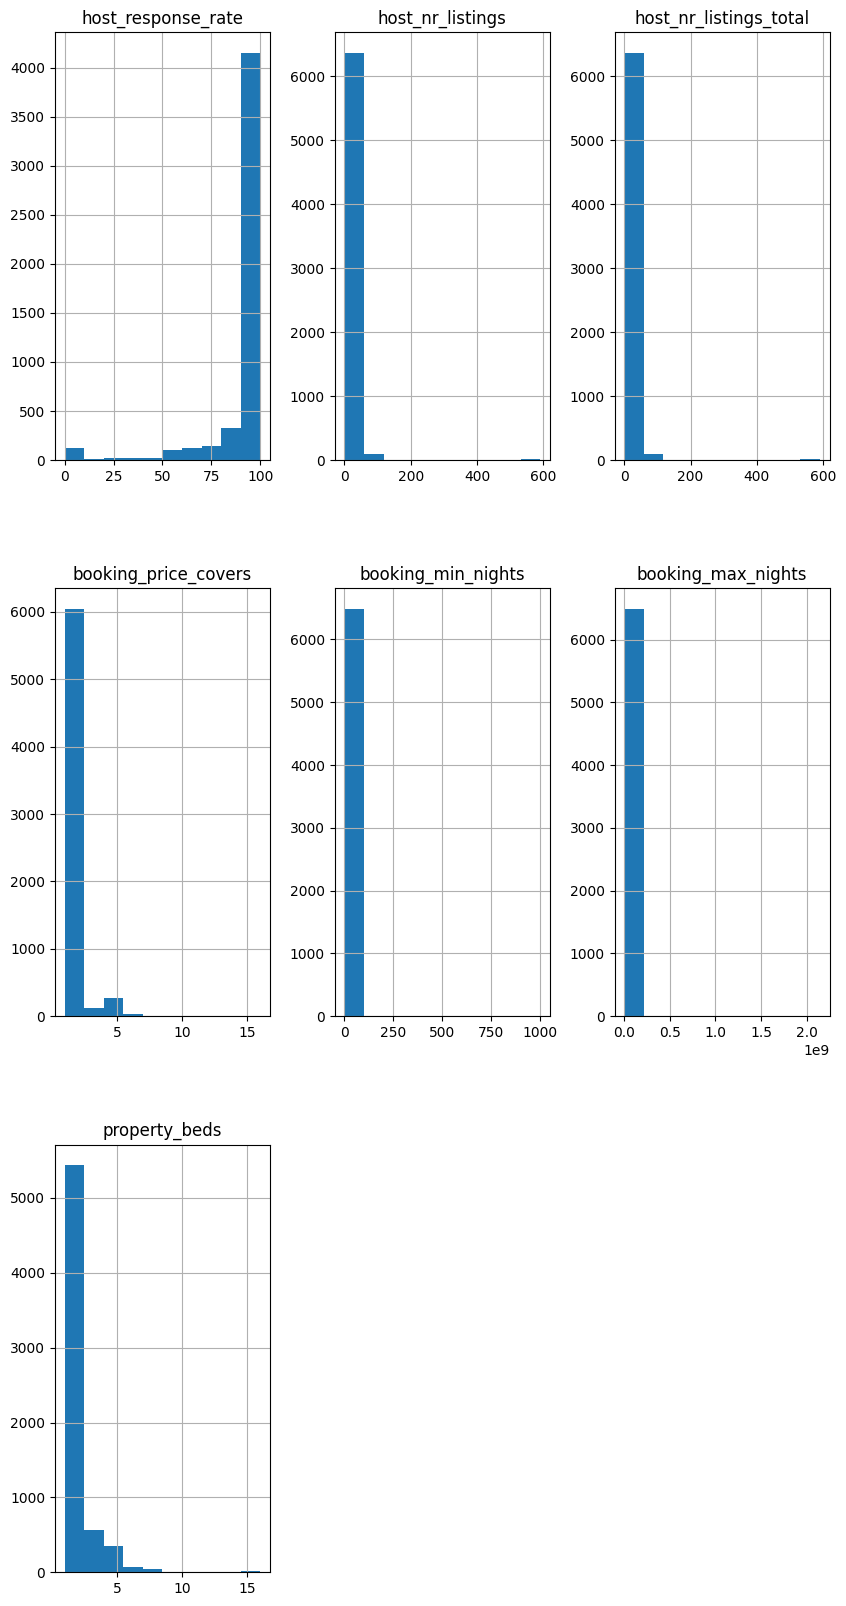

In [9]:
#plot distribution of numeric features
num.hist(figsize=(10,20), bins=10);

In [10]:
print(num.min())
print(num.max())


host_response_rate        0.0
host_nr_listings          0.0
host_nr_listings_total    0.0
booking_price_covers      1.0
booking_min_nights        1.0
booking_max_nights        1.0
property_beds             1.0
dtype: float64
host_response_rate        1.000000e+02
host_nr_listings          5.910000e+02
host_nr_listings_total    5.910000e+02
booking_price_covers      1.600000e+01
booking_min_nights        1.000000e+03
booking_max_nights        2.147484e+09
property_beds             1.600000e+01
dtype: float64


# impute missingness and encoding

In [11]:
#host_nr_listings and host_nr_listings_total
#since the outliers in the nr-listing
#replace missingness by median
median=df['host_nr_listings'].median
df['host_nr_listings'].fillna(median, inplace=True)
median_total=df['host_nr_listings_total'].median
df['host_nr_listings_total'].fillna(median_total, inplace=True)


In [12]:
#11 missingness
#hence, use k nereast neighbour imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df['property_beds']=imputer.fit_transform(df[['property_beds']])


In [13]:
#check missingness again
df.isnull().sum()


property_id                  0
host_about                3107
host_response_time        1461
host_response_rate        1461
host_nr_listings             0
host_nr_listings_total       0
host_verified                0
booking_price_covers         0
booking_min_nights           0
booking_max_nights           0
property_beds                0
dtype: int64

In [14]:
#there are 1461 missingness in host response time and host response rate
#can not directly ignore or impute with median or mode
#create a value represent missingness
print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)
#5 category in total

Null values: 1461
Proportion: 22.5%


within an hour        0.379061
unknown               0.224942
within a few hours    0.206467
within a day          0.159045
a few days or more    0.030485
Name: host_response_time, dtype: float64

In [15]:
print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 92.0
Median host response rate: 100.0
Proportion of 100% host response rates: 70.0%


In [16]:
#according to histogram, convert into four categories for better interpretation
df.host_response_rate = pd.cut(df.host_response_rate,
                               bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)


In [17]:
df.host_response_rate = df.host_response_rate.astype('str')
df.host_response_rate.replace('nan', 'unknown', inplace=True)
df.host_response_rate.value_counts()



100%       3525
unknown    1461
50-89%      843
90-99%      384
0-49%       282
Name: host_response_rate, dtype: int64

In [19]:
#encode host_response time
#unkonw is encoded as 1
ord_enc = OrdinalEncoder()
df["responsetime_code"] = ord_enc.fit_transform(df[["host_response_time"]])
df[["host_response_time", "responsetime_code"]].head(20)

,host_response_time,responsetime_code
0,within a few hours,3.0
1,within a few hours,3.0
2,within an hour,4.0
3,within an hour,4.0
4,within an hour,4.0
5,within an hour,4.0
6,a few days or more,0.0
7,within an hour,4.0
8,within a few hours,3.0
9,within a day,2.0


In [20]:
#process host_verified
df.host_verified.value_counts()

email, phone, reviews                                           1742
email, phone, reviews, jumio                                    1461
email, phone, facebook, reviews, jumio                           437
email, phone, facebook, reviews                                  437
email, phone                                                     298
                                                                ... 
email, phone, facebook, google, reviews, kba, work_email           1
email, phone, manual_online, manual_offline                        1
phone, facebook, jumio, offline_government_id, government_id       1
reviews, jumio                                                     1
email, phone, linkedin, reviews, work_email                        1
Name: host_verified, Length: 147, dtype: int64

In [21]:
#convert verifying document with and without official id into booleen and binary data
df['logit_host_verified']= df.host_verified.str.contains("offline_government_id|government_id|driver’s license|passport|identity card|id|visa", regex=True)
df['logit_host_verified'].head(10)
df['bin_host_verified']=df['logit_host_verified'].astype(int)
df['bin_host_verified'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: bin_host_verified, dtype: int64

In [22]:
#create new column indicating possible addition bed
df['available_extra_beds']=df['property_beds']-df['booking_price_covers']

In [24]:
#drop unnecessary columns：host_about, host_verified(since already convert to binary variable)
df=df.drop(['host_about', 'host_verified'], axis=1)

In [25]:
df.head(5)

,property_id,host_response_time,host_response_rate,host_nr_listings,host_nr_listings_total,booking_price_covers,booking_min_nights,booking_max_nights,property_beds,responsetime_code,logit_host_verified,bin_host_verified,available_extra_beds
0,1,within a few hours,100%,1.0,1.0,1,1,1125,1.0,3.0,False,0,0.0
1,2,within a few hours,50-89%,1.0,1.0,1,2,15,2.0,3.0,False,0,1.0
2,3,within an hour,100%,1.0,1.0,1,2,1125,1.0,4.0,False,0,0.0
3,4,within an hour,100%,2.0,2.0,1,1,1125,1.0,4.0,False,0,0.0
4,5,within an hour,100%,2.0,2.0,1,1,1125,1.0,4.0,False,0,0.0


In [26]:
#export clean data
df.to_csv('siwen.csv')
